# Trabalho MEAD - Questão 3

Nessa questão, subdividida em itens, vamos criar modelos de regressão múltipla ou regressão logística, dependendo do dataset escolhido.

a) Realizar uma análise descritiva dos dados plotando alguns gráficos e analisando algumas estatísticas básicas. (1 ponto)

b) Construir um modelo utilizando todas as variáveis do dataset. Após o ajuste do modelo será necessário interpretar cada coeficiente no impacto da variável resposta, dizendo a relação com a variável resposta e se são significantes ou não. O modelo no geral é significante? Como podemos afirmar isso? Interprete o coeficiente de determinação ou o desvio (dependendo do modelo escolhido)? Para o dataset de restaurantes, queremos prever o preço do jantar de acordo com as outras variáveis. (2 pontos)

c) Investigar se as premissas do modelo foram violadas. (1 ponto)

d) Construir mais dois modelos diferentes do modelo saturado construído acima, justificando a escolha das variáveis. Não deixe de analisar se as premissas estão sendo violadas. (2 pontos)

e) Qual o melhor modelo? Comparar os modelos construídos com pelo menos três métricas, justificando a escolha do melhor modelo. (1 ponto)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import graphs

## ITEM (A) - Análise Descritiva

Nosso dataset é uma tabela com as informações sobre preço do aluguel de imóveis em diversas cidades brasileiras.

In [4]:
df = pd.read_csv('rents.csv',sep=";")
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent
0,Belo Horizonte,22,1,1,0,0,acept,not furnished,499
1,Rio de Janeiro,30,1,1,1,3,acept,not furnished,507
2,São Paulo,35,1,1,0,0,not acept,not furnished,508
3,Porto Alegre,30,1,1,0,0,not acept,not furnished,509
4,Belo Horizonte,25,1,1,1,1,not acept,not furnished,545


In [5]:
print('São ',len(df), 'imóveis, em ',len(df['city'].unique().tolist()), 'cidades diferentes.')
df.columns

São  10384 imóveis, em  5 cidades diferentes.


Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'rent'],
      dtype='object')

Temos 9 colunas:
- 'city' - Cidade do imóvel <br>
- 'area' - área total do imóvel <br>
- 'rooms' - número de quartos <br>
- 'bathroom' - número de banheiros <br>
- 'parking spaces' - vagas de garagem <br>
- 'floor' - andar do imóvel <br>
- 'animal' - permite animais ou não <br>
- 'furniture' - mobiliado ou não <br>
- 'rent' - preço do aluguel

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10384.0,151.936633,544.613637,11.0,58.0,94.0,190.00,46335.0
rooms,10384.0,2.534669,1.168856,1.0,2.0,3.0,3.00,13.0
bathroom,10384.0,2.263675,1.413534,1.0,1.0,2.0,3.00,10.0
parking spaces,10384.0,1.638482,1.597421,0.0,1.0,1.0,2.00,12.0
floor,10384.0,5.066545,5.321767,0.0,1.0,3.0,8.00,51.0
rent,10384.0,5475.384919,12640.275841,499.0,2116.0,3674.0,6888.25,1120000.0


Primeiras impressões: <br>
- A área dos apartamentos varia entre 11 e 46.335 m2, com média de 151 m2. <br>
- Os apartamentos variam entre 1 e 13 quartos, com média de 2,5 quartos. <br>
- O número de banheiros varia entre 1 e 10, com média de 2,3 banheiros. <br>
- O número de vagas de garagem varia entre 0 e 12, com média de 1,6. <br>
- Temos imóveis que são casas, com andar=0, e temos apartamentos que chegam ao 51o. andar, com o andar médio sendo o 5o. <br> 
- O apartamento mais barato custa 499 reais e o mais caro custa 1,12 milhão de reais, com média de 5.475 reais/mês.

In [7]:
df.corr()

,area,rooms,bathroom,parking spaces,floor,rent
area,1.000000,0.191698,0.224760,0.191869,-0.014768,0.067057
rooms,0.191698,1.000000,0.731279,0.613057,-0.098496,0.185068
bathroom,0.224760,0.731279,1.000000,0.694771,0.002353,0.262218
parking spaces,0.191869,0.613057,0.694771,1.000000,-0.030444,0.201744
floor,-0.014768,-0.098496,0.002353,-0.030444,1.000000,0.056149
rent,0.067057,0.185068,0.262218,0.201744,0.056149,1.000000


Temos 3 colunas com um valor de correlação maior do que 0.5: 'rooms', 'bathroom' e 'parking spaces'. Isso faz sentido, quanto mais quartos, mais banheiros e mais vagas na garagem. Esperávamos que 'area' também estivesse nesse grupo, mas a maior correlação desse parâmetro é com 'bathroom', com valor de 0.22.

Text(0, 0.5, 'Aluguel médio')

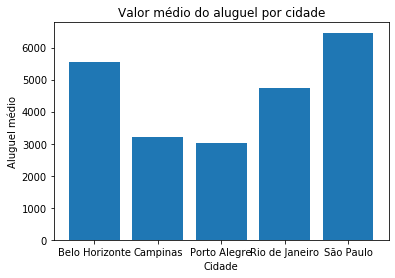

In [8]:
df_cidade=pd.DataFrame(df.groupby(['city'])['rent'].mean()).reset_index()
plt.bar(df_cidade['city'], df_cidade['rent'])

plt.title('Valor médio do aluguel por cidade')

plt.xlabel('Cidade')
plt.ylabel('Aluguel médio')



Text(0, 0.5, 'Andar médio')

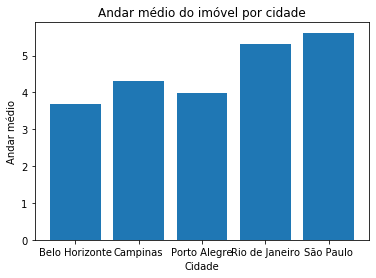

In [9]:
df_andar=pd.DataFrame(df.groupby(['city'])['floor'].mean()).reset_index()
plt.bar(df_andar['city'], df_andar['floor'])

plt.title('Andar médio do imóvel por cidade')

plt.xlabel('Cidade')
plt.ylabel('Andar médio')



Text(0, 0.5, 'Aluguel médio')

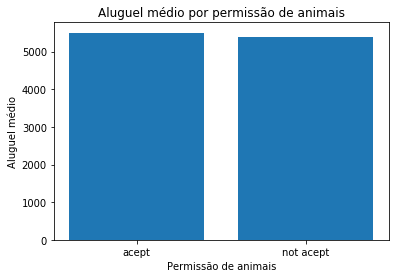

In [10]:
df_animais=pd.DataFrame(df.groupby(['animal'])['rent'].mean()).reset_index()
plt.bar(df_animais['animal'], df_animais['rent'])

plt.title('Aluguel médio por permissão de animais')

plt.xlabel('Permissão de animais')
plt.ylabel('Aluguel médio')


Text(0, 0.5, 'Aluguel médio')

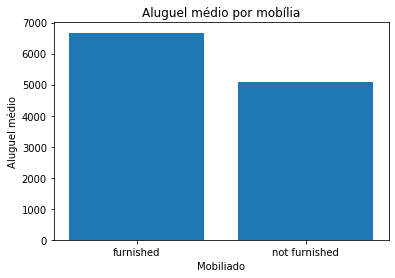

In [11]:
df_moveis=pd.DataFrame(df.groupby(['furniture'])['rent'].mean()).reset_index()
plt.bar(df_moveis['furniture'], df_moveis['rent'])

plt.title('Aluguel médio por mobília')

plt.xlabel('Mobiliado')
plt.ylabel('Aluguel médio')


<function matplotlib.pyplot.show(*args, **kw)>

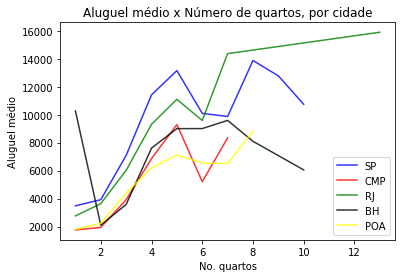

In [12]:
df_cidadequarto=pd.DataFrame(df.groupby(['city','rooms'])['rent'].mean()).reset_index()

plt.plot(df_cidadequarto[df_cidadequarto['city']=='São Paulo']['rooms'], df_cidadequarto[df_cidadequarto['city']=='São Paulo']['rent'], alpha=0.8, c='blue', label="SP")
plt.plot(df_cidadequarto[df_cidadequarto['city']=='Campinas']['rooms'], df_cidadequarto[df_cidadequarto['city']=='Campinas']['rent'], alpha=0.8, c='red', label="CMP")
plt.plot(df_cidadequarto[df_cidadequarto['city']=='Rio de Janeiro']['rooms'], df_cidadequarto[df_cidadequarto['city']=='Rio de Janeiro']['rent'], alpha=0.8, c='green', label="RJ")
plt.plot(df_cidadequarto[df_cidadequarto['city']=='Belo Horizonte']['rooms'], df_cidadequarto[df_cidadequarto['city']=='Belo Horizonte']['rent'], alpha=0.8, c='black', label="BH")
plt.plot(df_cidadequarto[df_cidadequarto['city']=='Porto Alegre']['rooms'], df_cidadequarto[df_cidadequarto['city']=='Porto Alegre']['rent'], alpha=0.8, c='yellow', label="POA")

plt.title('Aluguel médio x Número de quartos, por cidade')
plt.legend(loc=4)

plt.xlabel('No. quartos')
plt.ylabel('Aluguel médio')

plt.show

## ITEM (B) - Construção do Modelo


Vamos construir um modelo para estimar o valor do aluguel ('rent') em função das outras 8 colunas. Para isso, precisamos converter as colunas categóricas ('city','animal' e 'furniture') em colunas numéricas usando OneHotEncoder.


In [13]:
df_categorico=df[['city', 'animal', 'furniture']].copy()
df_numerico=df.copy()
df_numerico.pop('city')
df_numerico.pop('animal')
df_numerico.pop('furniture')

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(df_categorico)

df_categorico_ohe = pd.DataFrame(encoder.transform(df_categorico))
df_final=pd.concat([df_categorico_ohe,df_numerico],axis=1)

In [14]:
df_final.head()

,0,1,2,3,4,5,area,rooms,bathroom,parking spaces,floor,rent
0,0.0,0.0,0.0,0.0,0.0,1.0,22,1,1,0,0,499
1,0.0,0.0,1.0,0.0,0.0,1.0,30,1,1,1,3,507
2,0.0,0.0,0.0,1.0,1.0,1.0,35,1,1,0,0,508
3,0.0,1.0,0.0,0.0,1.0,1.0,30,1,1,0,0,509
4,0.0,0.0,0.0,0.0,1.0,1.0,25,1,1,1,1,545


In [15]:
df_final=df_final.rename(columns={0: "CMP", 1: "POA", 2: "RJ", 3: "SP", 4: "N_anim", 5: "N_mob"})

In [16]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CMP,10384.0,0.079449,0.270452,0.0,0.0,0.0,0.00,1.0
POA,10384.0,0.111421,0.314668,0.0,0.0,0.0,0.00,1.0
RJ,10384.0,0.138193,0.345119,0.0,0.0,0.0,0.00,1.0
SP,10384.0,0.554122,0.497086,0.0,0.0,1.0,1.00,1.0
N_anim,10384.0,0.217835,0.412795,0.0,0.0,0.0,0.00,1.0
N_mob,10384.0,0.755297,0.429932,0.0,1.0,1.0,1.00,1.0
area,10384.0,151.936633,544.613637,11.0,58.0,94.0,190.00,46335.0
rooms,10384.0,2.534669,1.168856,1.0,2.0,3.0,3.00,13.0
bathroom,10384.0,2.263675,1.413534,1.0,1.0,2.0,3.00,10.0
parking spaces,10384.0,1.638482,1.597421,0.0,1.0,1.0,2.00,12.0


Podemos ver que as primeiras colunas, que antes eram categóricas, agora estão com valores entre 0 e 1. Vamos normalizar as colunas numéricas, menos 'rent', para que todas as colunas tenham o mesmo peso inicial no modelo.

In [17]:
df_final["area"] = df_final["area"] / df_final["area"].max()
df_final["rooms"] = df_final["rooms"] / df_final["rooms"].max()
df_final["bathroom"] = df_final["bathroom"] / df_final["bathroom"].max()
df_final["parking spaces"] = df_final["parking spaces"] / df_final["parking spaces"].max()
df_final["floor"] = df_final["floor"] / df_final["floor"].max()


In [18]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CMP,10384.0,0.079449,0.270452,0.000000,0.000000,0.000000,0.000000,1.0
POA,10384.0,0.111421,0.314668,0.000000,0.000000,0.000000,0.000000,1.0
RJ,10384.0,0.138193,0.345119,0.000000,0.000000,0.000000,0.000000,1.0
SP,10384.0,0.554122,0.497086,0.000000,0.000000,1.000000,1.000000,1.0
N_anim,10384.0,0.217835,0.412795,0.000000,0.000000,0.000000,0.000000,1.0
N_mob,10384.0,0.755297,0.429932,0.000000,1.000000,1.000000,1.000000,1.0
area,10384.0,0.003279,0.011754,0.000237,0.001252,0.002029,0.004101,1.0
rooms,10384.0,0.194975,0.089912,0.076923,0.153846,0.230769,0.230769,1.0
bathroom,10384.0,0.226367,0.141353,0.100000,0.100000,0.200000,0.300000,1.0
parking spaces,10384.0,0.136540,0.133118,0.000000,0.083333,0.083333,0.166667,1.0


Agora que tudo está normalizado, vamos separar a propriedade que queremos prever, 'rent', das demais.

In [19]:
y=df_final['rent']
x=sm.add_constant(df_final.drop('rent',axis=1))
x.head()

,const,CMP,POA,RJ,SP,N_anim,N_mob,area,rooms,bathroom,parking spaces,floor
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000475,0.076923,0.1,0.000000,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000647,0.076923,0.1,0.083333,0.058824
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.000755,0.076923,0.1,0.000000,0.000000
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.000647,0.076923,0.1,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000540,0.076923,0.1,0.083333,0.019608


O próximo passo é realizar o treinamento do modelo Simples de Mínimos Quadrados, com a constante e todas as 11 variáveis que temos.

In [20]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     79.10
Date:                Thu, 20 Aug 2020   Prob (F-statistic):          3.69e-172
Time:                        18:24:36   Log-Likelihood:            -1.1239e+05
No. Observations:               10384   AIC:                         2.248e+05
Df Residuals:                   10372   BIC:                         2.249e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            343.1239    561.346      0.611      0.541    -757.223    1443.470
CMP            -1272.9849    554.464     -2.296      0.022   -2359.841    -186.128
POA             -899.4821    512.402     -1.755      0.079   -1903.888     104.924
RJ               663.7180    488.939      1.357      0.175    -294.696    1622.132
SP               473.6629    394.465      1.201      0.230    -299.564    1246.890
N_anim           611.7785    295.773      2.068      0.039      32.007    1191.550
N_mob          -1122.5245    284.083     -3.951      0.000   -1679.381    -565.668
area            9015.1166   1.04e+04      0.864      0.388   -1.14e+04    2.95e+04
rooms           -265.9728   2071.554     -0.128      0.898   -4326.618    3794.672
bathroom         2.02e+04   1423.948     14.186      0.000    1.74e+04     2.3e+04
parking spaces  4336.2358   1304.393      3.324      0.001    1779.375    6893.097
floor           5550.9711   1171.246      4.739      0.000    3255.102    7846.840
==============================================================================
Omnibus:                    37922.721   Durbin-Watson:                   0.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      20180381939.154
Skew:                          76.715   Prob(JB):                         0.00
Kurtosis:                    6830.762   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nosso modelo linear então é dado por: 
<br>
'rent'= 343.1 - 1273.0* 'CMP' -899.5* 'POA' +663.7* 'RJ' +473.7* 'SP' +611.8* 'N_anim' -1122.5* 'N_mob' +9015.1* 'area' -266.0* 'rooms' +2020* 'bathroom' +4336.2* 'parking spaces' +5551.0* 'floor' <br>
Com bases nesses coeficientes, temos as seguintes conclusões:
- Os parâmetros mais significantes são, na ordem, 'bathroom','area','floor' e 'parking spaces'.
- O aluguel de um apartamento sofre uma redução caso ele esteja em Campinas ou Porto Alegre e um acréscimo em São Paulo ou Rio.
- Não permitir animais aumenta o valor, enquanto não possuir mobília reduz.
- Quanto maior a área, maior o aluguel.
- O número de banheiros é mais importante do que o número de quartos.
- Quanto mais alto o imóvel, maior o seu aluguel.

O Coeficiente de Determinação é extremamente baixo, 0.077, e temos muitas colunas com P maior do que 0.05.<br>

In [22]:
rent_pred = 343.1239 - 1272.9849*df_final['CMP'] - 899.4821*df_final['POA'] +663.718*df_final['RJ'] +473.6629*df_final['SP'] +611.7785*df_final['N_anim'] -1122.5245*df_final['N_mob'] +9015.1166*df_final['area'] -265.9728*df_final['rooms'] +2020*df_final['bathroom'] +4336.2358*df_final['parking spaces'] +5550.9711*df_final['floor']

Text(0, 0.5, 'Aluguel previsto')

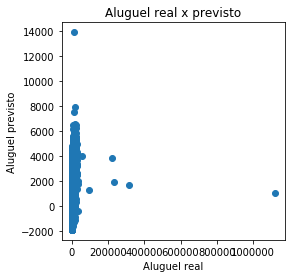

In [23]:
plt.figure(figsize=(4, 4))
plt.scatter(df_final['rent'],rent_pred)

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')


Temos alguns *outliers*, então vamos fazer uma aproximação no gráfico.

(0, 30000)

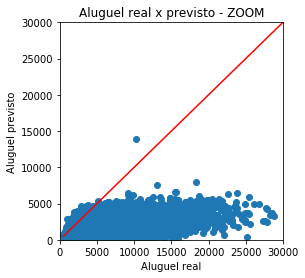

In [24]:
plt.figure(figsize=(4, 4))
plt.scatter(df_final['rent'],rent_pred)
plt.plot(y,y,color='red')

plt.title('Aluguel real x previsto - ZOOM')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')
plt.xlim(0,30000)
plt.ylim(0,30000)

Realmente, o modelo é muito ruim, justificando o coeficiente de determinação próximo de zero.

Percebemos que temos alguns *outliers* que podem estar prejudicando o modelo. Por isso, vamos filtrar os imóveis com valores de aluguel muito díspares. Para isso, vamos analisar a distribuição de 'rent'.

In [25]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
CMP,10384.0,0.079449,0.270452,0.000000,0.000000,0.000000,0.000000,1.0
POA,10384.0,0.111421,0.314668,0.000000,0.000000,0.000000,0.000000,1.0
RJ,10384.0,0.138193,0.345119,0.000000,0.000000,0.000000,0.000000,1.0
SP,10384.0,0.554122,0.497086,0.000000,0.000000,1.000000,1.000000,1.0
N_anim,10384.0,0.217835,0.412795,0.000000,0.000000,0.000000,0.000000,1.0
N_mob,10384.0,0.755297,0.429932,0.000000,1.000000,1.000000,1.000000,1.0
area,10384.0,0.003279,0.011754,0.000237,0.001252,0.002029,0.004101,1.0
rooms,10384.0,0.194975,0.089912,0.076923,0.153846,0.230769,0.230769,1.0
bathroom,10384.0,0.226367,0.141353,0.100000,0.100000,0.200000,0.300000,1.0
parking spaces,10384.0,0.136540,0.133118,0.000000,0.083333,0.083333,0.166667,1.0


Para definir os *outliers*, vamos definir o Intervalo Interquartil (IQR) para 'rent', a diferença entre o valor do quartil 3 (75%) e do quartil 1 (25%). Em nosso caso, 6888.25 - 2116.00 = 4772.25. Vamos considerar *outliers* qualquer valor que seja maior do Q3+X* IQR e menor do que Q1-X* IQR. Podemos afrouxar ou restringir o modelo pelo valor de X. Normalmente se usa um valor de 1.5, mas como só queremos tirar os dados muito espúrios, vamos usar X=3. Não temos *outliers* para baixo, mas vamos eliminar os valores de aluguel acima de 21205 reais.

In [26]:
df_final_sout=pd.concat([df_categorico_ohe,df_numerico],axis=1)
df_final_sout=df_final_sout.rename(columns={0: "CMP", 1: "POA", 2: "RJ", 3: "SP", 4: "N_anim", 5: "N_mob"})

df_final_sout=df_final_sout[df_final_sout['rent']<21205]
print('Ao filtrar os outliers, passamos de ',len(df_final), 'para ',len(df_final_sout),'imóveis, ou seja, eliminamos ',len(df_final)-len(df_final_sout),'imóveis.')

df_final_sout["area"] = df_final_sout["area"] / df_final_sout["area"].max()
df_final_sout["rooms"] = df_final_sout["rooms"] / df_final_sout["rooms"].max()
df_final_sout["bathroom"] = df_final_sout["bathroom"] / df_final_sout["bathroom"].max()
df_final_sout["parking spaces"] = df_final_sout["parking spaces"] / df_final_sout["parking spaces"].max()
df_final_sout["floor"] = df_final_sout["floor"] / df_final_sout["floor"].max()

y_sout=df_final_sout['rent']
x_sout=sm.add_constant(df_final_sout.drop('rent',axis=1))

model_sout = sm.OLS(y_sout, x_sout).fit()
model_sout.summary()

Ao filtrar os outliers, passamos de  10384 para  10306 imóveis, ou seja, eliminamos  78 imóveis.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     1322.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:25:02   Log-Likelihood:                -96104.
No. Observations:               10306   AIC:                         1.922e+05
Df Residuals:                   10294   BIC:                         1.923e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -532.8933    126.028     -4.228      0.000    -779.932    -285.854
CMP             -229.0232    124.076     -1.846      0.065    -472.237      14.191
POA               74.2851    114.776      0.647      0.518    -150.698     299.268
RJ              1621.3968    109.546     14.801      0.000    1406.665    1836.129
SP              1414.9327     88.490     15.990      0.000    1241.475    1588.390
N_anim           136.3286     66.310      2.056      0.040       6.349     266.308
N_mob          -1356.8211     63.779    -21.274      0.000   -1481.841   -1231.801
area            8858.0984   2333.008      3.797      0.000    4284.950    1.34e+04
rooms           6218.8400    465.746     13.352      0.000    5305.887    7131.793
bathroom         1.35e+04    322.392     41.869      0.000    1.29e+04    1.41e+04
parking spaces  6277.7427    294.485     21.318      0.000    5700.495    6854.990
floor           5725.3675    263.822     21.702      0.000    5208.224    6242.510
==============================================================================
Omnibus:                     2411.264   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7533.653
Skew:                           1.194   Prob(JB):                         0.00
Kurtosis:                       6.441   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Parece que a eliminação dos *outliers* ajudou o modelo novo, que agora tem um Coeficiente de Determinação de 0.586.<br>
Nosso modelo linear então é dado por: 
<br>
'rent'= -532.9 - 229.0* 'CMP' +74.3* 'POA' +1621.4* 'RJ' +1414.9* 'SP' +136.3* 'N_anim' -1356.8* 'N_mob' +8858.1* 'area' +6218.8* 'rooms' +13500* 'bathroom' +6277.7* 'parking spaces' +5725.4* 'floor'


Com bases nesses coeficientes, temos as seguintes conclusões:
- Os parâmetros mais significantes são, na ordem, 'bathroom', 'area', 'parking spaces', 'rooms' e 'floor'.
- O aluguel de um apartamento sofre um aumento considerável caso ele esteja em São Paulo ou Rio.
- Não permitir animais não afeta muito, mas não possuir mobília reduz o valor.
- Quanto maior a área, maior o aluguel.
- O número de banheiros é mais importante do que o número de quartos.
- Quanto mais alto o imóvel, maior o seu aluguel.

In [27]:
rent_pred_sout = -532.9 - 229*df_final_sout['CMP'] +74.3*df_final_sout['POA'] +1621.4*df_final_sout['RJ'] +1414.9*df_final_sout['SP'] +136.3*df_final_sout['N_anim'] -1356.8*df_final_sout['N_mob'] +8858.1*df_final_sout['area'] +6218.8*df_final_sout['rooms'] +13500*df_final_sout['bathroom'] +6277.7*df_final_sout['parking spaces'] +5725.4*df_final_sout['floor']

Text(0, 0.5, 'Aluguel previsto')

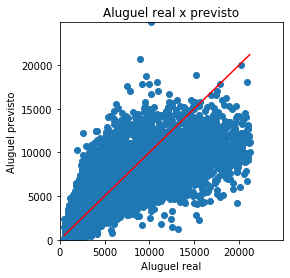

In [28]:
plt.figure(figsize=(4, 4))
plt.scatter(y_sout,rent_pred_sout)
plt.plot(y_sout,y_sout,color='red')

plt.xlim(0,rent_pred_sout.max())
plt.ylim(0,rent_pred_sout.max())

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')

O modelo está MUITO melhor do que estava antes. Só 2 das variáveis tem P-valor acima de 0.05, 'CMP' e 'POA'.

(0, 21190)

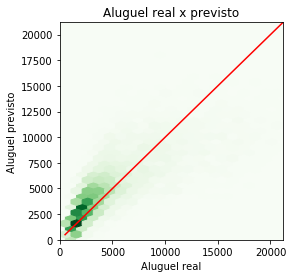

In [29]:
plt.figure(figsize=(4, 4))
plt.hexbin(y_sout, rent_pred_sout, gridsize=(20, 20), extent=(0, y_sout.max(), 0, y_sout.max()),cmap='Greens')
plt.plot(y_sout,y_sout,color='red')

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')
plt.xlim(0,y_sout.max())
plt.ylim(0,y_sout.max())


Temos aqui um histograma 2D, para mostrar se aquela grande dispersão realmente é relevante ou se temos poucos pontos espalhados longe do valor real. Temos um grande grupo de imóveis com valores abaixo de 5000 reais que foram superestimados pelo modelo, mas temos uma nuvem tênue de valores altos que são subestimados para valores altos. (A imagem está muito clara. Mudando o ângulo de visão é possível a nuvem.) 

## ITEM (C) - Análise das premissas


### 1- Linearidade
Vamos reapresentar o nosso modelo e acrescentar a linha esperada 'aluguel previsto = aluguel real'. 

Text(0, 0.5, 'Aluguel previsto')

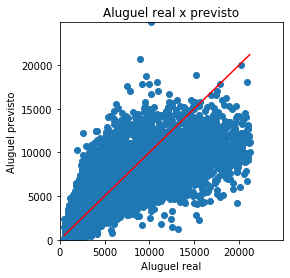

In [30]:
plt.figure(figsize=(4, 4))
plt.scatter(y_sout,rent_pred_sout)
plt.plot(y_sout,y_sout,color='red')

plt.xlim(0,rent_pred_sout.max())
plt.ylim(0,rent_pred_sout.max())

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')

Embora a dispersão seja grande, parece haver uma tendência linear. Isso se confirma no histograma anterior.

### 2 - Homocedasticidade e independência dos erros


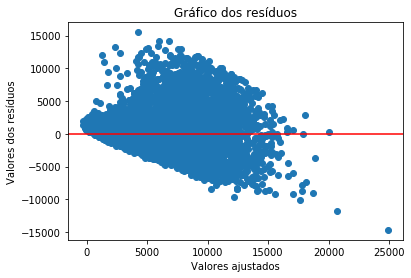

In [31]:
plt.scatter(model_sout.fittedvalues,model_sout.resid)
plt.title('Gráfico dos resíduos')
plt.xlabel('Valores ajustados')
plt.ylabel('Valores dos resíduos')
plt.axhline(color='red')

Parece haver uma dispersão grande dos resíduos, sem uma tendência bem definida.

### 3 - Normalidade


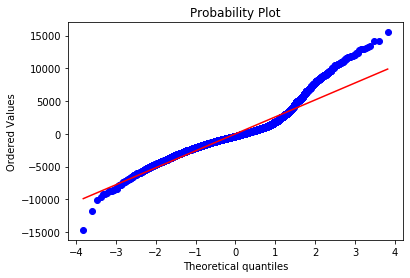

In [32]:
graph_plotter=graphs.AssumptionGraphs(model_sout)
graph_plotter.plot_qq()

Parece haver problemas na normalidade.

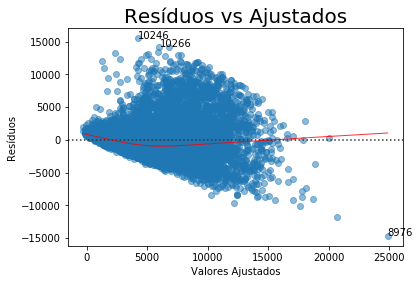

In [33]:
graph_plotter.plot_residual_fitted_values(y_sout)

A premissa de normalidade é ferida, mas a tendência dos resíduos é ficar próxima a zero.

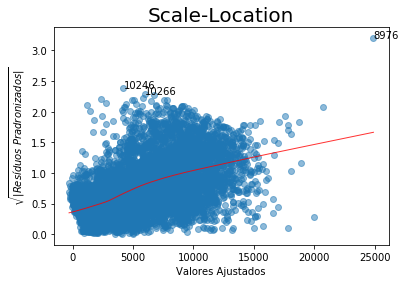

In [34]:
graph_plotter.plot_scale_location()

Podemos ver que os resíduos tem uma tendência de crescer com o valor ajustado, o que fere a Homocedasticidade.

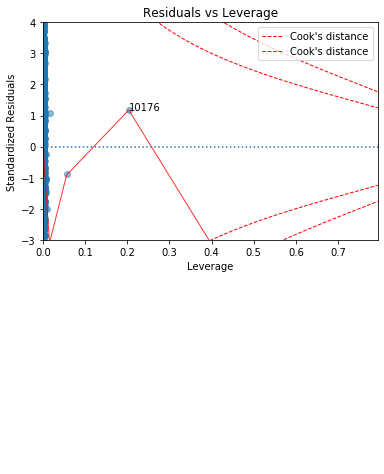

In [35]:
graph_plotter.plot_influence()

Temos ainda dois pontos que tem grande influência no modelo que continuaram depois do nosso filtro de *outliers*.

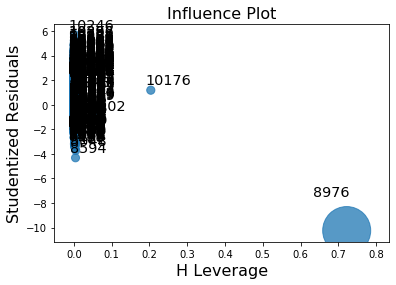

In [36]:
model_sout.get_influence().plot_influence();

Confirmamos que ainda existem esses dois *outliers*.

Como temos somente 2 *outliers*, vamos refazer o modelo retirando esses dois imóveis.

## ITEM (B) - Construção do Modelo - revisão


Vamos refazer o modelo a partir do momento onde fizemos a primeira remoção de *outliers*. Uma vez nesse ponto, vamos eliminar as linhas 8976 e 10176, conforme visto nos gráficos de influência. 

In [38]:
df_final_sout2=pd.concat([df_categorico_ohe,df_numerico],axis=1)
df_final_sout2=df_final_sout2.rename(columns={0: "CMP", 1: "POA", 2: "RJ", 3: "SP", 4: "N_anim", 5: "N_mob"})

df_final_sout2=df_final_sout2[df_final_sout2['rent']<21205]
print('Ao filtrar os outliers no valor de aluguel, passamos de ',len(df_final), 'para ',len(df_final_sout2),'imóveis, ou seja, eliminamos ',len(df_final)-len(df_final_sout),'imóveis.')

display(df_final_sout2.describe().T)

print('Imóveis que chamaram a atenção:')
display(df_final_sout2.iloc[8976,:])
display(df_final_sout2.iloc[10176,:])

Ao filtrar os outliers no valor de aluguel, passamos de  10384 para  10306 imóveis, ou seja, eliminamos  78 imóveis.


,count,mean,std,min,25%,50%,75%,max
CMP,10306.0,0.080050,0.271384,0.0,0.00,0.0,0.0,1.0
POA,10306.0,0.111974,0.315349,0.0,0.00,0.0,0.0,1.0
RJ,10306.0,0.138851,0.345808,0.0,0.00,0.0,0.0,1.0
SP,10306.0,0.552009,0.497312,0.0,0.00,1.0,1.0,1.0
N_anim,10306.0,0.218222,0.413059,0.0,0.00,0.0,0.0,1.0
N_mob,10306.0,0.755385,0.429879,0.0,1.00,1.0,1.0,1.0
area,10306.0,149.670289,545.759160,11.0,58.00,93.0,185.0,46335.0
rooms,10306.0,2.524549,1.163587,1.0,2.00,2.0,3.0,13.0
bathroom,10306.0,2.244906,1.395072,1.0,1.00,2.0,3.0,10.0
parking spaces,10306.0,1.619833,1.579972,0.0,1.00,1.0,2.0,12.0


Imóveis que chamaram a atenção:


CMP                   0.0
POA                   0.0
RJ                    0.0
SP                    0.0
N_anim                0.0
N_mob                 0.0
area              46335.0
rooms                 4.0
bathroom              8.0
parking spaces        5.0
floor                11.0
rent              10220.0
Name: 8976, dtype: float64

CMP                   0.0
POA                   0.0
RJ                    0.0
SP                    1.0
N_anim                0.0
N_mob                 1.0
area              24606.0
rooms                 5.0
bathroom              4.0
parking spaces        4.0
floor                12.0
rent              18320.0
Name: 10176, dtype: float64

In [39]:
df_final_sout2.sort_values('area').tail(10)

,CMP,POA,RJ,SP,N_anim,N_mob,area,rooms,bathroom,parking spaces,floor,rent
10071,0.0,0.0,0.0,0.0,0.0,1.0,1000,5,7,8,0,17130
7947,0.0,0.0,0.0,0.0,0.0,0.0,1020,5,4,6,0,7281
10218,0.0,0.0,0.0,1.0,0.0,1.0,1100,4,6,10,0,19210
8772,0.0,0.0,0.0,1.0,0.0,0.0,1600,6,6,6,0,9549
9383,0.0,0.0,0.0,1.0,0.0,1.0,1600,4,5,12,0,12010
6793,0.0,0.0,0.0,0.0,0.0,1.0,2000,4,2,3,0,5238
8332,0.0,0.0,0.0,0.0,0.0,0.0,2000,3,3,2,2,8267
3202,1.0,0.0,0.0,0.0,0.0,1.0,12732,3,2,0,3,2417
10176,0.0,0.0,0.0,1.0,0.0,1.0,24606,5,4,4,12,18320
8976,0.0,0.0,0.0,0.0,0.0,0.0,46335,4,8,5,11,10220


Percebemos que os dois imóveis que foram marcados são os dois que possuem a maior área. Vamos aplicar o mesmo filtro que fizemos para 'rent' em 'area'. Nesse caso, temos IQR = 185 - 58 = 127. Vamos considerar outliers qualquer valor que seja maior do Q3+X* IQR e menor do que Q1-X* IQR. Podemos afrouxar ou restringir o modelo pelo valor de X. Normalmente se usa um valor de 1.5, mas como só queremos tirar os dados muito espúrios, vamos usar X=3. Não temos outliers para baixo, mas vamos eliminar os valores de aluguel acima de 566 m2.

In [42]:
df_final_sout2=df_final_sout2[df_final_sout2['area']<566]
print('Ao filtrar os outliers no valor do aluguel e da area, passamos de ',len(df_final), 'para ',len(df_final_sout2),'imóveis, ou seja, eliminamos ',len(df_final)-len(df_final_sout2),'imóveis.')

Ao filtrar os outliers no valor do aluguel e da area, passamos de  10384 para  10148 imóveis, ou seja, eliminamos  236 imóveis.


In [43]:
df_final_sout2["area"] = df_final_sout2["area"] / df_final_sout2["area"].max()
df_final_sout2["rooms"] = df_final_sout2["rooms"] / df_final_sout2["rooms"].max()
df_final_sout2["bathroom"] = df_final_sout2["bathroom"] / df_final_sout2["bathroom"].max()
df_final_sout2["parking spaces"] = df_final_sout2["parking spaces"] / df_final_sout2["parking spaces"].max()
df_final_sout2["floor"] = df_final_sout2["floor"] / df_final_sout2["floor"].max()

y_sout2=df_final_sout2['rent']
x_sout2=sm.add_constant(df_final_sout2.drop('rent',axis=1))

model_sout2 = sm.OLS(y_sout2, x_sout2).fit()
model_sout2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1534.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:30:00   Log-Likelihood:                -93830.
No. Observations:               10148   AIC:                         1.877e+05
Df Residuals:                   10136   BIC:                         1.878e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -57.8878    118.282     -0.489      0.625    -289.744     173.968
CMP             -255.8422    116.039     -2.205      0.027    -483.302     -28.383
POA              -16.6140    106.984     -0.155      0.877    -226.324     193.096
RJ              1405.4217    102.255     13.744      0.000    1204.982    1605.861
SP              1308.8334     82.871     15.794      0.000    1146.390    1471.276
N_anim           152.8209     61.556      2.483      0.013      32.160     273.482
N_mob          -1349.4407     59.526    -22.670      0.000   -1466.123   -1232.758
area            9233.6716    244.173     37.816      0.000    8755.044    9712.300
rooms            656.4787    461.862      1.421      0.155    -248.863    1561.820
bathroom        8348.6568    337.215     24.758      0.000    7687.648    9009.666
parking spaces  2199.9939    246.968      8.908      0.000    1715.887    2684.101
floor           7081.1775    248.452     28.501      0.000    6594.162    7568.193
==============================================================================
Omnibus:                     2344.759   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8361.034
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       6.825   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Parece que a eliminação dos outliers de área ajudou o modelo novo, pois o Coeficiente de Determinação passou de 0.586 para 0.625.
Nosso modelo linear então é dado por:<br>
'rent'= -57.9 - 255.8* 'CMP' -16.6* 'POA' +1405.4* 'RJ' +1308.8* 'SP' +152.8* 'N_anim' -1349.4* 'N_mob' +9223.7* 'area' +656.5* 'rooms' +8348.7* 'bathroom' +2200.0* 'parking spaces' +7081.2* 'floor'

Com bases nesses coeficientes, temos as seguintes conclusões:
- Os parâmetros mais significantes são, na ordem, 'area', 'bathroom', 'floor' e 'parking spaces'.
- O aluguel de um apartamento sofre um aumento considerável caso ele esteja em São Paulo ou Rio.
- Não permitir animais não afeta muito, mas não possuir mobília reduz o valor.
- Quanto maior a área, maior o aluguel.
- O número de banheiros é mais importante do que o número de quartos.
- Quanto mais alto o imóvel, maior o seu aluguel.

Text(0, 0.5, 'Aluguel previsto')

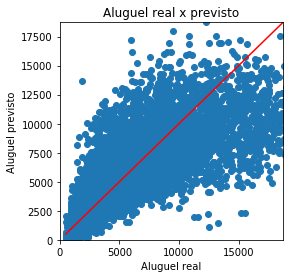

In [44]:
rent_pred_sout2 = -57.9 - 255.8*df_final_sout2['CMP'] -16.6*df_final_sout2['POA'] +1405.4*df_final_sout2['RJ'] +1308.8*df_final_sout2['SP'] +152.8*df_final_sout2['N_anim'] -1349.4*df_final_sout2['N_mob'] +9223.7*df_final_sout2['area'] +656.5*df_final_sout2['rooms'] +8348.7*df_final_sout2['bathroom'] +2200*df_final_sout2['parking spaces'] +7081.2*df_final_sout2['floor']

plt.figure(figsize=(4, 4))
plt.scatter(y_sout2,rent_pred_sout2)
plt.plot(y_sout2,y_sout2,color='red')

plt.xlim(0,rent_pred_sout2.max())
plt.ylim(0,rent_pred_sout2.max())

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')

(0, 21190)

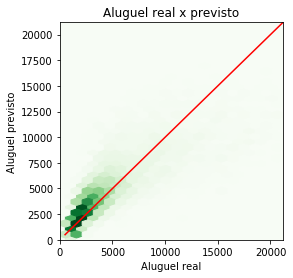

In [45]:
plt.figure(figsize=(4, 4))
plt.hexbin(y_sout2, rent_pred_sout2, gridsize=(20, 20), extent=(0, y_sout2.max(), 0, y_sout2.max()),cmap='Greens')
plt.plot(y_sout2,y_sout2,color='red')

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')
plt.xlim(0,y_sout2.max())
plt.ylim(0,y_sout2.max())

## ITEM (C) - Análise das premissas

### 1- Linearidade
Como podemos ver acima, essa premissa parece ser cumprida.

### 2 - Homocedasticidade e independência dos erros


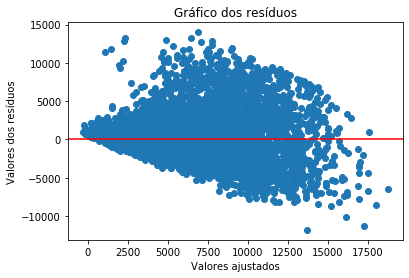

In [46]:
plt.scatter(model_sout2.fittedvalues,model_sout2.resid)
plt.title('Gráfico dos resíduos')
plt.xlabel('Valores ajustados')
plt.ylabel('Valores dos resíduos')
plt.axhline(color='red')

Parece haver uma dispersão grande dos resíduos, sem uma tendência bem definida.

### 3 - Normalidade

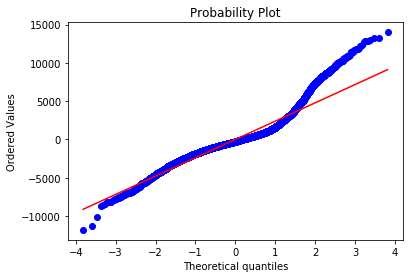

In [47]:
graph_plotter=graphs.AssumptionGraphs(model_sout2)
graph_plotter.plot_qq()

Parece que os problemas na normalidade continuam.

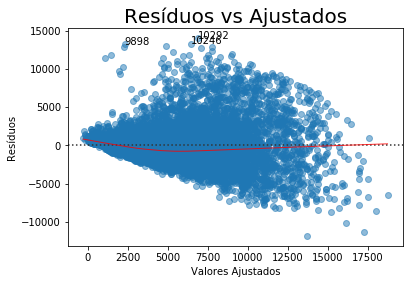

In [48]:
graph_plotter.plot_residual_fitted_values(y_sout2)

A premissa de normalidade é ferida, mas a tendência dos resíduos é ficar próxima a zero.

KeyError: 10135

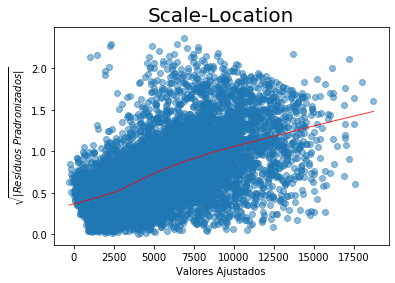

In [49]:
graph_plotter.plot_scale_location()

Podemos ver que os resíduos tem uma tendência de crescer com o valor ajustado, o que fere a Homocedasticidade.

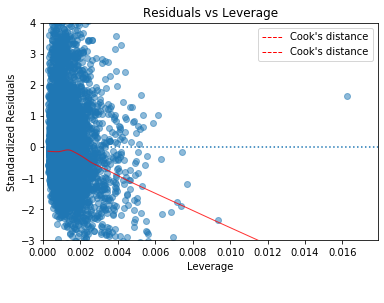

In [50]:
graph_plotter.plot_influence()

Antes tínhamos um ponto com Leverage=0.2 e outro com Leverage=0.1. Com a remoção dos outliers, o maior Leverage caiu uma ordem de grandeza, para 0.016.

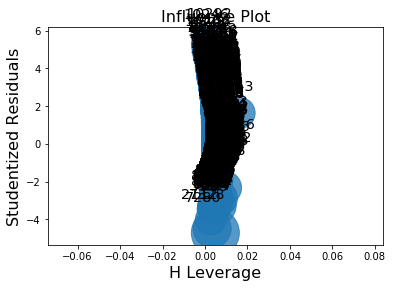

In [51]:
model_sout2.get_influence().plot_influence();

Como esperado, não há pontos que se destaquem do conjunto.

## ITEM (D) - Construção de Outros Modelos

### Modelo 2 - Modelo exp
O primeiro modelo que vamos propor será baseado em nossa intuição de quais variáveis parecem ser mais relevantes. Com base na lista de variáveis, ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'animal', 'furniture'] e na nossa experiência na busca de imóveis em nossas cidades, vamos criar um modelo removendo as variáveis 'animal', 'bathroom' e 'floor', na esperança de obter um resultado melhor do que o original. 

In [52]:
model_sout2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1534.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:33:39   Log-Likelihood:                -93830.
No. Observations:               10148   AIC:                         1.877e+05
Df Residuals:                   10136   BIC:                         1.878e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -57.8878    118.282     -0.489      0.625    -289.744     173.968
CMP             -255.8422    116.039     -2.205      0.027    -483.302     -28.383
POA              -16.6140    106.984     -0.155      0.877    -226.324     193.096
RJ              1405.4217    102.255     13.744      0.000    1204.982    1605.861
SP              1308.8334     82.871     15.794      0.000    1146.390    1471.276
N_anim           152.8209     61.556      2.483      0.013      32.160     273.482
N_mob          -1349.4407     59.526    -22.670      0.000   -1466.123   -1232.758
area            9233.6716    244.173     37.816      0.000    8755.044    9712.300
rooms            656.4787    461.862      1.421      0.155    -248.863    1561.820
bathroom        8348.6568    337.215     24.758      0.000    7687.648    9009.666
parking spaces  2199.9939    246.968      8.908      0.000    1715.887    2684.101
floor           7081.1775    248.452     28.501      0.000    6594.162    7568.193
==============================================================================
Omnibus:                     2344.759   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8361.034
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       6.825   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vamos remover então as variáveis que desejamos para criar o novo modelo.

In [53]:
y_sout_exp=df_final_sout2['rent']
x_sout_exp=x_sout2.drop('bathroom',axis=1)
x_sout_exp=x_sout_exp.drop('N_anim',axis=1)
x_sout_exp=x_sout_exp.drop('floor',axis=1)

model_sout_exp = sm.OLS(y_sout_exp, x_sout_exp).fit()
model_sout_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     1637.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:33:47   Log-Likelihood:                -94596.
No. Observations:               10148   AIC:                         1.892e+05
Df Residuals:                   10139   BIC:                         1.893e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1063.8003    119.052      8.936      0.000     830.434    1297.166
CMP             -154.7958    124.856     -1.240      0.215    -399.537      89.946
POA               14.5080    114.645      0.127      0.899    -210.218     239.234
RJ              1667.0909    109.632     15.206      0.000    1452.191    1881.990
SP              1760.1831     88.387     19.914      0.000    1586.927    1933.439
N_mob          -1688.5087     63.410    -26.628      0.000   -1812.805   -1564.213
area            1.112e+04    237.115     46.883      0.000    1.07e+04    1.16e+04
rooms           4117.0768    467.722      8.802      0.000    3200.249    5033.904
parking spaces  4170.3599    257.745     16.180      0.000    3665.129    4675.591
==============================================================================
Omnibus:                     2202.200   Durbin-Watson:                   0.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7181.512
Skew:                           1.094   Prob(JB):                         0.00
Kurtosis:                       6.492   Cond. No.                         26.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O Coeficiente de Determinação piorou, caindo de 0.625 para 0.564.

Text(0, 0.5, 'Aluguel previsto')

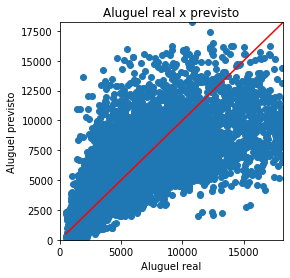

In [56]:
rent_pred_sout_exp = 1063.8 - 154.8*df_final_sout2['CMP'] +14.5*df_final_sout2['POA'] +1667.1*df_final_sout2['RJ'] +1760.2*df_final_sout2['SP'] -1688.5*df_final_sout2['N_mob'] +11120*df_final_sout2['area'] +4116.1*df_final_sout2['rooms']  +4170.3*df_final_sout2['parking spaces']

plt.figure(figsize=(4, 4))
plt.scatter(y_sout_exp,rent_pred_sout_exp)
plt.plot(y_sout_exp,y_sout_exp,color='red')

plt.xlim(0,rent_pred_sout_exp.max())
plt.ylim(0,rent_pred_sout_exp.max())

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')

Vamos comparar com o modelo anterior.

Text(0, 0.5, 'Aluguel modelo exp')

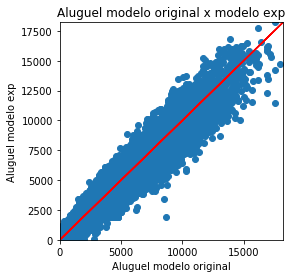

In [58]:
plt.figure(figsize=(4, 4))
plt.scatter(rent_pred_sout2,rent_pred_sout_exp)
plt.plot(rent_pred_sout2,rent_pred_sout2,color='red')

plt.xlim(0,rent_pred_sout_exp.max())
plt.ylim(0,rent_pred_sout_exp.max())

plt.title('Aluguel modelo original x modelo exp')
plt.xlabel('Aluguel modelo original')
plt.ylabel('Aluguel modelo exp')

Nosso novo modelo baseado em nossa intuição gerou um modelo com uma dispersão maior do que o original.

### Modelo 2 (exp) - Análise das Premissas

#### Linearidade
Já mostramos que o dado pode ser estimatido com um modelo linear.

#### Homocedasticidade e independência dos erros


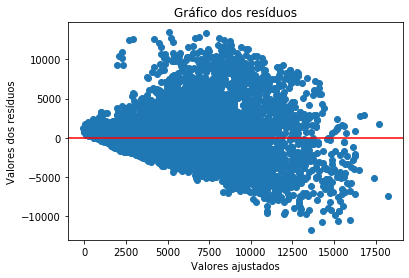

In [60]:
plt.scatter(model_sout_exp.fittedvalues,model_sout_exp.resid)
plt.title('Gráfico dos resíduos')
plt.xlabel('Valores ajustados')
plt.ylabel('Valores dos resíduos')
plt.axhline(color='red')

O comportamento original se mantém.

#### Normalidade

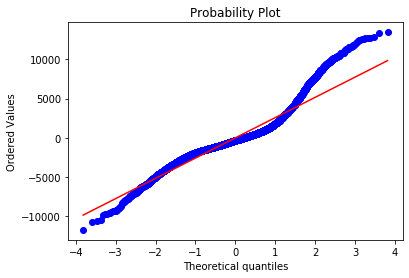

In [62]:
graph_plotter=graphs.AssumptionGraphs(model_sout_exp)
graph_plotter.plot_qq()

Parece que o nosso modelo novo piorou na análise de normalidade.

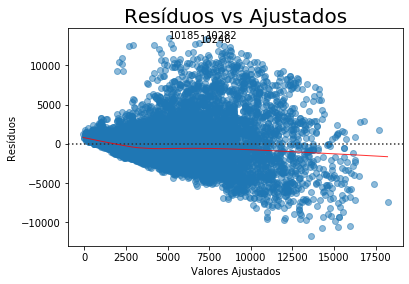

In [63]:
graph_plotter.plot_residual_fitted_values(y_sout_exp)

O comportamento agora se distanciou do zero, o que indica mais problemas nesse modelo.

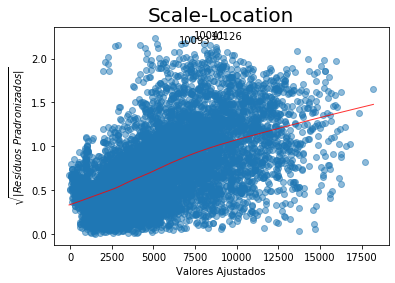

In [64]:
graph_plotter.plot_scale_location()

O comportamento original se mantém.

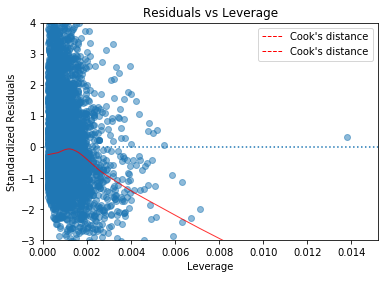

In [65]:
graph_plotter.plot_influence()

O Leverage máximo foi ainda mais reduzido.

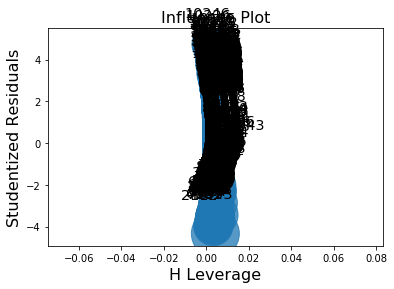

In [67]:
model_sout_exp.get_influence().plot_influence();

O comportamento original se mantém.

### Modelo 2 - Conclusão
Fizemos um modelo baseado em nossa experiência que se mostrou pior do que usando todas as variáveis. Isso demonstra que não temos uma ideia correta dos fatores que definem o valor do aluguel dos imóveis.

### Modelo 3 - redux
O segundo modelo que vamos construir é usando a técnica de remoção de variáveis com P-valor alto, com base no modelo original. Vamos retirar a variável com maior P-valor e refazer o modelo. Repetimos o processo até que todas as variáveis presentes no modelo tenham P-valor abaixo de 0.05.

In [89]:
model_sout2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1534.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:10:00   Log-Likelihood:                -93830.
No. Observations:               10148   AIC:                         1.877e+05
Df Residuals:                   10136   BIC:                         1.878e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -57.8878    118.282     -0.489      0.625    -289.744     173.968
CMP             -255.8422    116.039     -2.205      0.027    -483.302     -28.383
POA              -16.6140    106.984     -0.155      0.877    -226.324     193.096
RJ              1405.4217    102.255     13.744      0.000    1204.982    1605.861
SP              1308.8334     82.871     15.794      0.000    1146.390    1471.276
N_anim           152.8209     61.556      2.483      0.013      32.160     273.482
N_mob          -1349.4407     59.526    -22.670      0.000   -1466.123   -1232.758
area            9233.6716    244.173     37.816      0.000    8755.044    9712.300
rooms            656.4787    461.862      1.421      0.155    -248.863    1561.820
bathroom        8348.6568    337.215     24.758      0.000    7687.648    9009.666
parking spaces  2199.9939    246.968      8.908      0.000    1715.887    2684.101
floor           7081.1775    248.452     28.501      0.000    6594.162    7568.193
==============================================================================
Omnibus:                     2344.759   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8361.034
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       6.825   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A variável com maior P-valor é 'POA', com 0.877.

In [90]:
y_sout_redux=df_final_sout2['rent']
x_sout_redux=x_sout2.drop('POA',axis=1)

model_sout_redux = sm.OLS(y_sout_redux, x_sout_redux).fit()
model_sout_redux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     1688.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:10:01   Log-Likelihood:                -93830.
No. Observations:               10148   AIC:                         1.877e+05
Df Residuals:                   10137   BIC:                         1.878e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -68.4753     96.651     -0.708      0.479    -257.931     120.981
CMP             -247.5186    102.913     -2.405      0.016    -449.249     -45.788
RJ              1414.0192     85.967     16.448      0.000    1245.508    1582.531
SP              1317.0664     63.690     20.679      0.000    1192.220    1441.912
N_anim           153.8393     61.202      2.514      0.012      33.871     273.808
N_mob          -1348.8714     59.410    -22.704      0.000   -1465.327   -1232.416
area            9233.1090    244.135     37.820      0.000    8754.557    9711.661
rooms            665.4598    458.205      1.452      0.146    -232.713    1563.632
bathroom        8346.9588    337.022     24.767      0.000    7686.329    9007.588
parking spaces  2202.5091    246.425      8.938      0.000    1719.468    2685.550
floor           7081.5334    248.429     28.505      0.000    6594.562    7568.504
==============================================================================
Omnibus:                     2345.107   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8363.807
Skew:                           1.134   Prob(JB):                         0.00
Kurtosis:                       6.825   Cond. No.                         29.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O Coeficiente de Determinação continuou igual, em 0.625. A próxima variável a ser eliminada é 'const', com P-valor de 0.479.

In [91]:
x_sout_redux=x_sout_redux.drop('const',axis=1)

model_sout_redux = sm.OLS(y_sout_redux, x_sout_redux).fit()
model_sout_redux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rent   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              5758.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:10:03   Log-Likelihood:                         -93830.
No. Observations:               10148   AIC:                                  1.877e+05
Df Residuals:                   10138   BIC:                                  1.878e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CMP             -268.6154     98.509     -2.727      0.006    -461.712     -75.519
RJ              1391.0936     79.642     17.467      0.000    1234.980    1547.207
SP              1296.9380     57.001     22.753      0.000    1185.204    1408.672
N_anim           143.1239     59.303      2.413      0.016      26.879     259.369
N_mob          -1368.9143     52.241    -26.204      0.000   -1471.316   -1266.512
area            9251.0495    242.812     38.100      0.000    8775.090    9727.009
rooms            520.7049    410.119      1.270      0.204    -283.210    1324.619
bathroom        8329.8691    336.149     24.780      0.000    7670.950    8988.788
parking spaces  2213.5079    245.929      9.001      0.000    1731.438    2695.578
floor           7033.1108    238.837     29.447      0.000    6564.943    7501.278
==============================================================================
Omnibus:                     2359.610   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8420.836
Skew:                           1.141   Prob(JB):                         0.00
Kurtosis:                       6.835   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Ao remover a constante, nosso Coeficiente de Determinação passou de 0.625 para 0.850. Ainda temos uma variável com P-valor acima de 0.05, 'rooms', com 0.204. 

In [92]:
x_sout_redux=x_sout_redux.drop('rooms',axis=1)

model_sout_redux = sm.OLS(y_sout_redux, x_sout_redux).fit()
model_sout_redux.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   rent   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                              6397.
Date:                Thu, 20 Aug 2020   Prob (F-statistic):                        0.00
Time:                        19:10:05   Log-Likelihood:                         -93831.
No. Observations:               10148   AIC:                                  1.877e+05
Df Residuals:                   10139   BIC:                                  1.877e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CMP             -258.2447     98.173     -2.631      0.009    -450.682     -65.807
RJ              1408.5461     78.449     17.955      0.000    1254.770    1562.322
SP              1304.0284     56.729     22.987      0.000    1192.829    1415.228
N_anim           145.5484     59.274      2.456      0.014      29.360     261.736
N_mob          -1341.1160     47.433    -28.274      0.000   -1434.094   -1248.139
area            9346.8497    230.797     40.498      0.000    8894.441    9799.258
bathroom        8503.0004    307.258     27.674      0.000    7900.714    9105.286
parking spaces  2240.4818    245.017      9.144      0.000    1760.199    2720.764
floor           7056.5237    238.131     29.633      0.000    6589.740    7523.308
==============================================================================
Omnibus:                     2342.497   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8399.690
Skew:                           1.131   Prob(JB):                         0.00
Kurtosis:                       6.840   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Parece que agora atingimos o nosso modelo final, com o mesmo Coeficiente de Determinação do passo anterior, 0.85. <br>
As variáveis que foram retiradas foram 'const', 'POA' e 'rooms'. As duas primeiras realmente eram aquelas com o menor multiplicador, mas foi uma surpresa ver o número de quartos ser eliminado. Podemos supor que essa informação está sendo contabilizada, pois a correlação era alta com o número de banheiros e vagas de garagem.


Text(0, 0.5, 'Aluguel previsto')

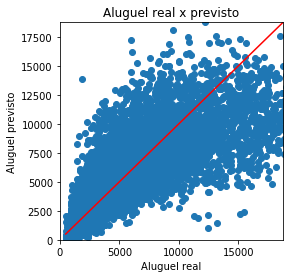

In [93]:
rent_pred_sout_redux = - 258.2*df_final_sout2['CMP'] +1408.5*df_final_sout2['RJ'] +1304*df_final_sout2['SP'] +145.4*df_final_sout2['N_anim'] -1341.1*df_final_sout2['N_mob'] +9346.8*df_final_sout2['area']  +8503*df_final_sout2['bathroom'] +2240.5*df_final_sout2['parking spaces'] +7056.5*df_final_sout2['floor']

plt.figure(figsize=(4, 4))
plt.scatter(y_sout_redux,rent_pred_sout_redux)
plt.plot(y_sout_redux,y_sout_redux,color='red')

plt.xlim(0,rent_pred_sout_redux.max())
plt.ylim(0,rent_pred_sout_redux.max())

plt.title('Aluguel real x previsto')
plt.xlabel('Aluguel real')
plt.ylabel('Aluguel previsto')

Vamos comparar com o modelo original.

Text(0, 0.5, 'Aluguel modelo redux')

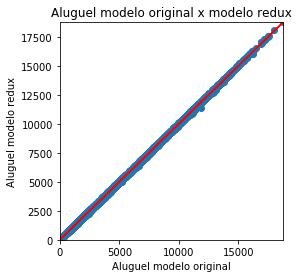

In [94]:
plt.figure(figsize=(4, 4))
plt.scatter(rent_pred_sout2,rent_pred_sout_redux)
plt.plot(rent_pred_sout2,rent_pred_sout2,color='red')

plt.xlim(0,rent_pred_sout_redux.max())
plt.ylim(0,rent_pred_sout_redux.max())

plt.title('Aluguel modelo original x modelo redux')
plt.xlabel('Aluguel modelo original')
plt.ylabel('Aluguel modelo redux')

O modelo redux é muito mais próximo do modelo original, enquanto o modelo exp tinha uma dispersão grande.

### Modelo 3 - Análise das Premissas

#### Linearidade
Já mostramos que o dado pode ser estimatido com um modelo linear.

#### Homocedasticidade e independência dos erros


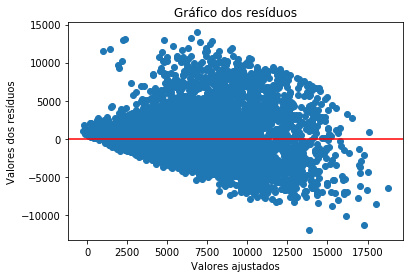

In [76]:
plt.scatter(model_sout_redux.fittedvalues,model_sout_redux.resid)
plt.title('Gráfico dos resíduos')
plt.xlabel('Valores ajustados')
plt.ylabel('Valores dos resíduos')
plt.axhline(color='red')

O comportamento original se mantém.

#### Normalidade

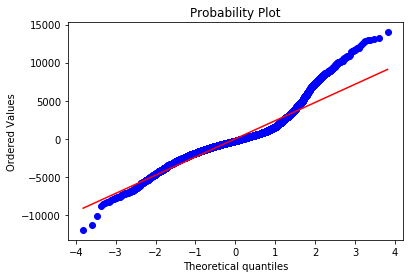

In [77]:
graph_plotter=graphs.AssumptionGraphs(model_sout_redux)
graph_plotter.plot_qq()

O comportamento original se mantém.

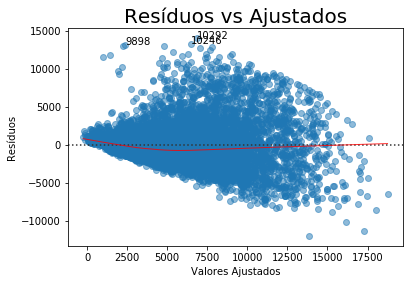

In [78]:
graph_plotter.plot_residual_fitted_values(y_sout_redux)

O comportamento original se mantém.

KeyError: 10135

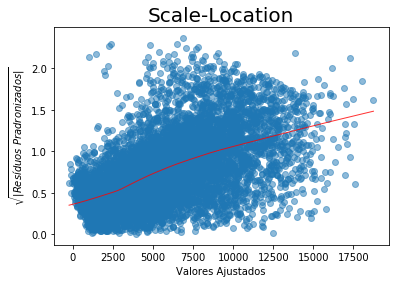

In [79]:
graph_plotter.plot_scale_location()

O comportamento original se mantém.

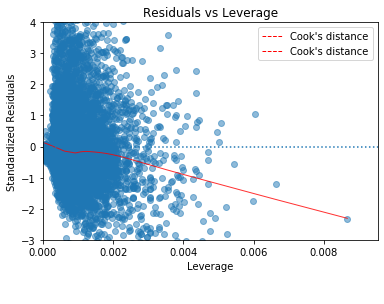

In [80]:
graph_plotter.plot_influence()

O Leverage máximo foi ainda mais reduzido.

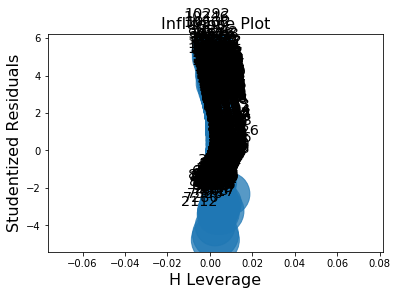

In [81]:
model_sout_redux.get_influence().plot_influence();

O comportamento original se mantém.

### Modelo 3 - Conclusão
As premissas do modelo linear mantém o mesmo comportamento após a remoção de 3 variáveis. O modelo redux conseguiu um Coeficiente de Determinação de 0.85 frente a 0.625 do modelo original.

## ITEM (E) - Comparação e métricas

Para terminar, precisamos definir qual dos três modelos é o melhor. Para isso, vamos utilizar três métricas.

A primeira métrica que vamos utilizar para comparar é uma que já foi apresentada, o Coeficiente de Determinação.


In [97]:
import sklearn.metrics
print('O Coeficiente de Determinação do modelo original é: ',model_sout2.rsquared)
print('O Coeficiente de Determinação do modelo exp é: ',model_sout_exp.rsquared)
print('O Coeficiente de Determinação do modelo redux é: ',model_sout_redux.rsquared)


O Coeficiente de Determinação do modelo original é:  0.6247747944849427
O Coeficiente de Determinação do modelo exp é:  0.5636147192310407
O Coeficiente de Determinação do modelo redux é:  0.850260279521146


O Erro Absoluto Médio é a média entre as diferenças de módulo entre os valores preditos e os valores reais. Dá uma ideia de quão erro foram as previsões.


In [104]:
print('O erro absoluto médio do modelo original é: ',sklearn.metrics.mean_absolute_error(y_sout2,rent_pred_sout2))
print('O erro absoluto médio do modelo exp é: ',sklearn.metrics.mean_absolute_error(y_sout_exp,rent_pred_sout_exp))
print('O erro absoluto médio do modelo redux é: ',sklearn.metrics.mean_absolute_error(y_sout_redux,rent_pred_sout_redux))



O erro absoluto médio do modelo original é:  1687.2020264104783
O erro absoluto médio do modelo exp é:  1833.2857144539912
O erro absoluto médio do modelo redux é:  1685.9697512179791


O Erro Quadrático Médio é parecido com o Erro Absoluto Médio, pois dá uma ideia da magnitude do erro.


In [106]:
import math
print('O erro quadrático médio do modelo original é: ',math.sqrt(sklearn.metrics.mean_squared_error(y_sout2,rent_pred_sout2)))
print('O erro quadrático médio do modelo exp é: ',math.sqrt(sklearn.metrics.mean_squared_error(y_sout_exp,rent_pred_sout_exp)))
print('O erro quadrático médio do modelo redux é: ',math.sqrt(sklearn.metrics.mean_squared_error(y_sout_redux,rent_pred_sout_redux)))



O erro quadrático médio do modelo original é:  2507.9717775744753
O erro quadrático médio do modelo exp é:  2704.652073194015
O erro quadrático médio do modelo redux é:  2508.2344774825333


### Conclusão

Em todas as métricas, temos que o pior modelo foi o baseado na nossa experiência. Em duas das métricas, o modelo original e o modelo redux obtiveram resultados muito similares, mas houve uma grande distância no valor do Coeficiente de Determinação, o que nos leva a definir o **modelo redux** como o melhor dos três.